# Lab No 4: Geovisualization II - Apps.
# PART TWO
## 3 Challenges

# Challenge No 2

In [ ]:
# Here is the code for challenge 2, Lab 4

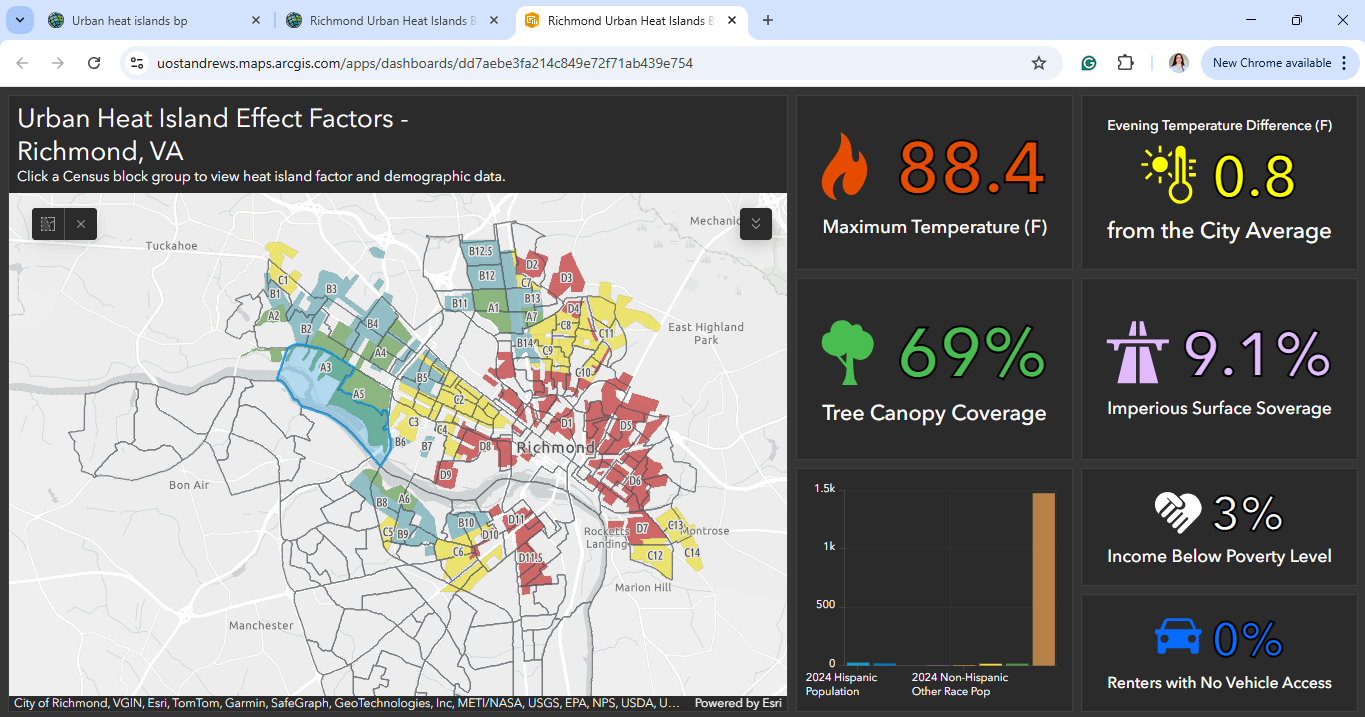

https://www.arcgis.com/apps/dashboards/dd7aebe3fa214c849e72f71ab439e754

# Challenge No 3

In [ ]:
# Here is the code for challenge 3, Lab 4

In [5]:
import requests
import zipfile
import os
import pandas as pd
import geopandas as gpd

#downloading shapefile
url = "https://maps.gov.scot/ATOM/shapefiles/SG_SIMD_2020.zip"
zip_path = "SG_SIMD_2020.zip"
extract_path = "SG_SIMD_2020"
with open(zip_path, "wb") as f:
    f.write(requests.get(url).content)

#unzipping shapefile
with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(extract_path)

#loading the shapefile into our gdf
shapefile = [f for f in os.listdir(extract_path) if f.endswith(".shp")][0]
gdf = gpd.read_file(os.path.join(extract_path, shapefile))

#printing the first five rows of data
print(gdf.head())

    DataZone       DZName         LAName  SAPE2017  WAPE2017  Rankv2  \
0  S01006506  Culter - 01  Aberdeen City       894       580    4691   
1  S01006507  Culter - 02  Aberdeen City       793       470    4862   
2  S01006508  Culter - 03  Aberdeen City       624       461    5686   
3  S01006509  Culter - 04  Aberdeen City       537       307    4332   
4  S01006510  Culter - 05  Aberdeen City       663       415    3913   

   Quintilev2  Decilev2  Vigintilv2  Percentv2  ... CrimeRate  CrimeRank  \
0           4         7          14         68  ...       125     4664.0   
1           4         7          14         70  ...       128     4602.0   
2           5         9          17         82  ...       130     4563.5   
3           4         7          13         63  ...        75     5626.0   
4           3         6          12         57  ...       168     3885.0   

   HouseNumOC HouseNumNC  HouseOCrat  HouseNCrat  HouseRank    Shape_Leng  \
0          87         10         

**References**: bytecode (2024). Reading multiple shapefiles with geopandas from a zip file in memory. [online] Stack Overflow. Available at: https://stackoverflow.com/questions/77823335/reading-multiple-shapefiles-with-geopandas-from-a-zip-file-in-memory.

In [8]:
#subset our data frame to keep only data for edinburgh city 
gdf_subset = gdf[gdf["LAName"] == "City of Edinburgh"]
gdf_subset.head(3)

,DataZone,DZName,LAName,SAPE2017,WAPE2017,Rankv2,Quintilev2,Decilev2,Vigintilv2,Percentv2,...,CrimeRate,CrimeRank,HouseNumOC,HouseNumNC,HouseOCrat,HouseNCrat,HouseRank,Shape_Leng,Shape_Area,geometry
1911,S01008417,Balerno and Bonnington Village - 01,City of Edinburgh,708,397,5537,4,8,16,80,...,86,5392.0,17,8,2%,1%,6350.0,20191.721420,1.029993e+07,"POLYGON ((315157.369 666212.846, 315173.727 66..."
1912,S01008418,Balerno and Bonnington Village - 02,City of Edinburgh,691,378,6119,5,9,18,88,...,103,5063.0,7,10,1%,1%,6650.0,25944.861787,2.357050e+07,"POLYGON ((317816 666579, 318243 666121, 318495..."
1913,S01008419,Balerno and Bonnington Village - 03,City of Edinburgh,541,338,5200,4,8,15,75,...,187,3594.0,30,0,6%,0%,5372.5,5738.935106,1.366457e+06,"POLYGON ((316831 667049, 316816 667032.999, 31..."


In [9]:
#seeing the column titles
gdf_subset.columns

Index(['DataZone', 'DZName', 'LAName', 'SAPE2017', 'WAPE2017', 'Rankv2',
       'Quintilev2', 'Decilev2', 'Vigintilv2', 'Percentv2', 'IncRate',
       'IncNumDep', 'IncRankv2', 'EmpRate', 'EmpNumDep', 'EmpRank', 'HlthCIF',
       'HlthAlcSR', 'HlthDrugSR', 'HlthSMR', 'HlthDprsPc', 'HlthLBWTPc',
       'HlthEmergS', 'HlthRank', 'EduAttend', 'EduAttain', 'EduNoQuals',
       'EduPartici', 'EduUniver', 'EduRank', 'GAccPetrol', 'GAccDTGP',
       'GAccDTPost', 'GAccDTPsch', 'GAccDTSsch', 'GAccDTRet', 'GAccPTGP',
       'GAccPTPost', 'GAccPTRet', 'GAccBrdbnd', 'GAccRank', 'CrimeCount',
       'CrimeRate', 'CrimeRank', 'HouseNumOC', 'HouseNumNC', 'HouseOCrat',
       'HouseNCrat', 'HouseRank', 'Shape_Leng', 'Shape_Area', 'geometry'],
      dtype='object')

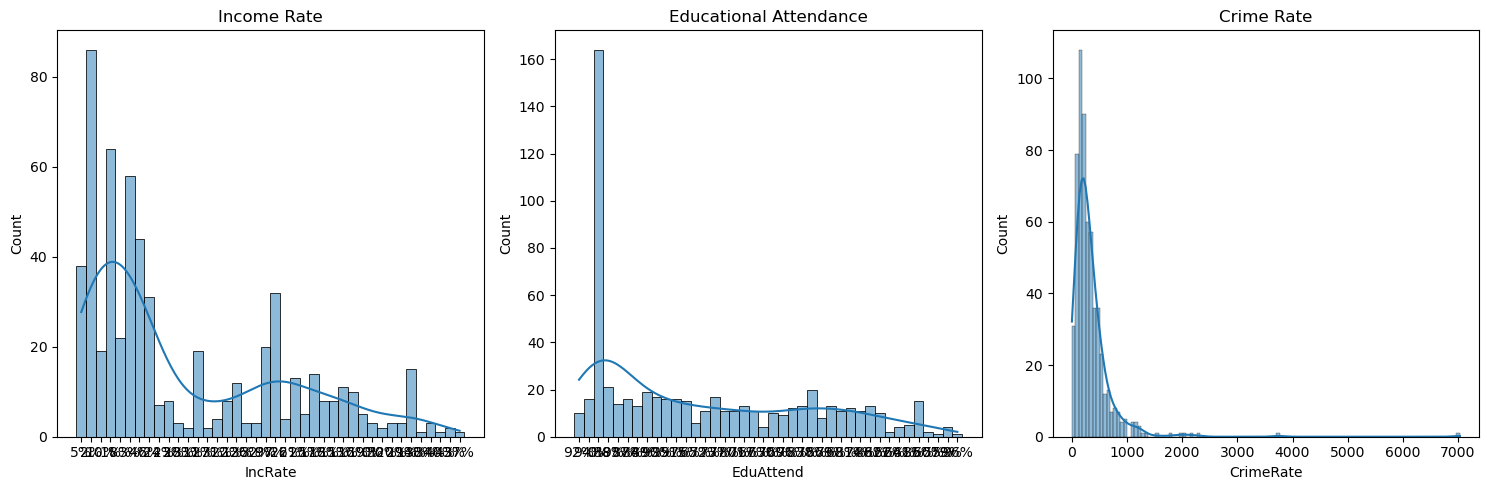

In [10]:
#using matplot lib to create chloropleth maps 
import numpy as np
import mapclassify as mc
import matplotlib.pyplot as plt
import folium
import seaborn as sns

#choosing my axes for the chloropleth map
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

#exploring different variables through generating histograms
sns.histplot(data=gdf_subset, x="IncRate",ax=axes[0], kde=True) 
sns.histplot(data=gdf_subset, x="EduAttend",ax=axes[1], kde=True) 
sns.histplot(data=gdf_subset, x="CrimeRate",ax=axes[2], kde=True) 

axes[0].set_title("Income Rate")
axes[1].set_title("Educational Attendance")
axes[2].set_title("Crime Rate")

plt.tight_layout()
plt.show()

In [11]:
#checking for any missing values
print(gdf_subset['IncRate'].isna().sum())
print(gdf_subset['EduAttend'].isna().sum())
print(gdf_subset['CrimeRate'].isna().sum())

0
0
0


In [12]:
#checking the data types
print(gdf_subset['IncRate'].dtype)
print(gdf_subset['EduAttend'].dtype)
print(gdf_subset['CrimeRate'].dtype)

object
object
int64


In [13]:
# number of classes for classification
num_classes = 5

# using natural breaks (jenks classification)
classifier_nb = mc.NaturalBreaks(gdf_subset['CrimeRate'], k=num_classes)
print(classifier_nb)
print(min(classifier_nb.bins), max(classifier_nb.bins))
print(classifier_nb.bins) #

# using equal interval classification
classifier_ei = mc.EqualInterval(gdf_subset['CrimeRate'], k=num_classes)
print(classifier_ei)
print(min(classifier_ei.bins), max(classifier_ei.bins))
print(classifier_ei.bins) 

NaturalBreaks

     Interval        Count
--------------------------
[   0.00,  301.00] |   358
( 301.00,  697.00] |   189
( 697.00, 1556.00] |    43
(1556.00, 3750.00] |     6
(3750.00, 7035.00] |     1
301.0 7035.0
[ 301.  697. 1556. 3750. 7035.]
EqualInterval

     Interval        Count
--------------------------
[   0.00, 1407.00] |   589
(1407.00, 2814.00] |     6
(2814.00, 4221.00] |     1
(4221.00, 5628.00] |     0
(5628.00, 7035.00] |     1
1407.0 7035.0
[1407. 2814. 4221. 5628. 7035.]


C:\Users\user\MiniForge\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


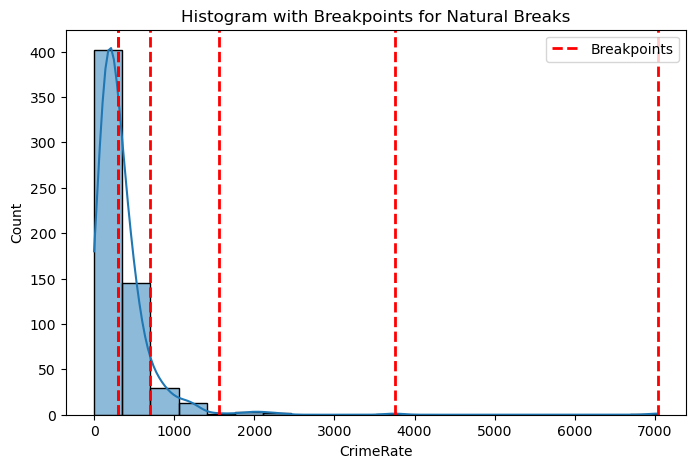

In [14]:
#creating a histogram with breakpoints for the crime rate in Edinburgh

fig, ax = plt.subplots(figsize=(8, 5))

sns.histplot(data=gdf_subset, x="CrimeRate", ax=ax, kde=True, bins=20)

# defining the style of the lines to represent the breakpoints
ax.axvline(classifier_nb.bins[0], color='red', linestyle='dashed', linewidth=2, label='Breakpoints') 
# a simple For to loop over all the elements in the array 'classifier_nb.bins'
for bin_value in classifier_nb.bins:
    ax.axvline(bin_value, color='red', linestyle='dashed', linewidth=2) 
 
#styling the histogram
ax.set_title("Histogram with Breakpoints for Natural Breaks")

#adding a legend
plt.legend()
plt.show()

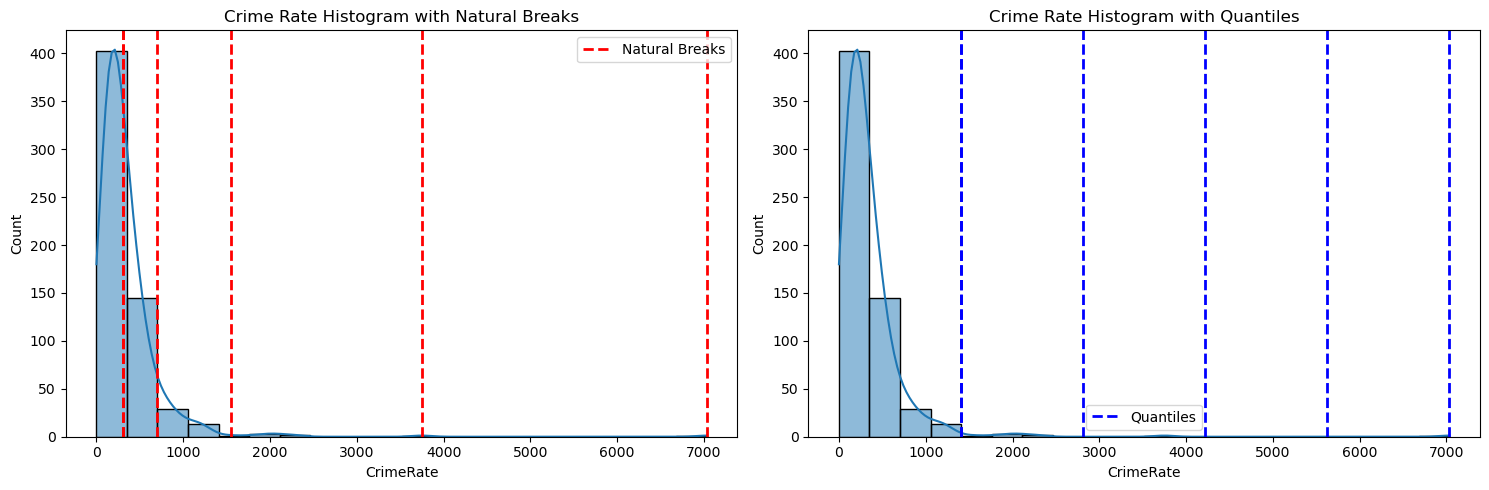

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
#generating histogram for crime rates in Edinburgh with natural breaks
sns.histplot(data=gdf_subset, x="CrimeRate", ax=axes[0], kde=True, bins=20)
axes[0].axvline(classifier_nb.bins[0], color='red', linestyle='dashed', linewidth=2, label='Natural Breaks')
for bin_value in classifier_nb.bins:
    axes[0].axvline(bin_value, color='red', linestyle='dashed', linewidth=2)
axes[0].set_title("Crime Rate Histogram with Natural Breaks")
axes[0].legend()

sns.histplot(data=gdf_subset, x="CrimeRate", ax=axes[1], kde=True, bins=20)
axes[1].axvline(classifier_ei.bins[0], color='blue', linestyle='dashed', linewidth=2, label='Quantiles')
for bin_value in classifier_ei.bins:
    axes[1].axvline(bin_value, color='blue', linestyle='dashed', linewidth=2)
axes[1].set_title("Crime Rate Histogram with Quantiles")
axes[1].legend()
#using the tight layout to display the histogram with natural breaks
plt.tight_layout()
plt.show()

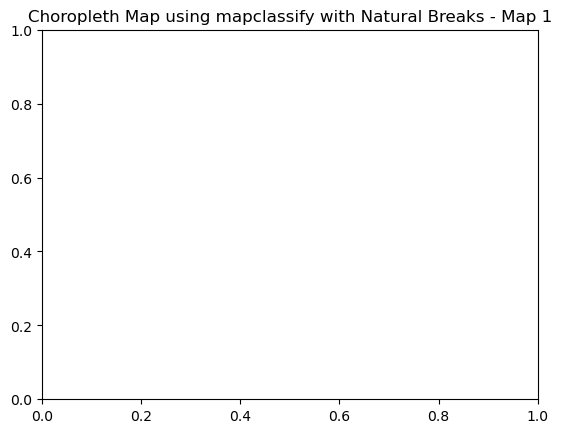

In [16]:
#generating a chloropleth map with natural breaks                                                                                                                                        fig, ax = plt.subplots(figsize=(12, 10))
gdf_subset.plot(column='CrimeRate', ax=ax,
         legend=True, cmap='viridis',
         scheme='UserDefined',
         classification_kwds={'bins': classifier_nb.bins} 
        )
plt.title("Choropleth Map using mapclassify with Natural Breaks - Map 1")
plt.show()

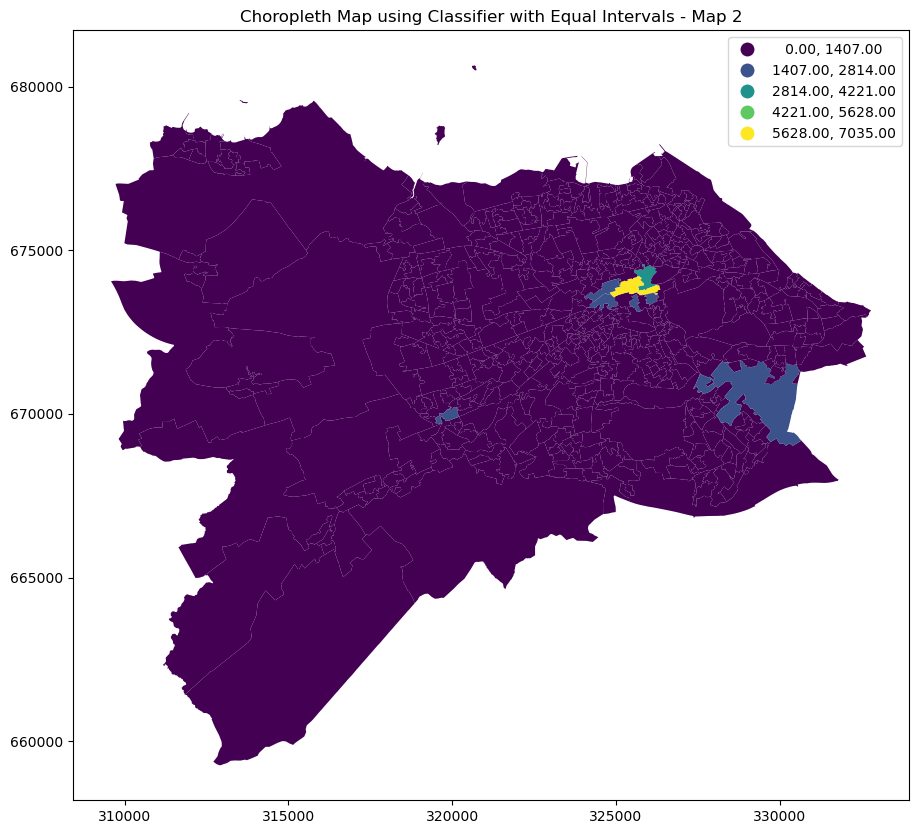

In [17]:
#generating a chloropleth map with equal intervals
fig, ax = plt.subplots(figsize=(12, 10))
gdf_subset.plot(column='CrimeRate', ax=ax,
         legend=True, cmap='viridis',
         scheme='UserDefined',
         classification_kwds={'bins': classifier_ei.bins},
        )
plt.title("Choropleth Map using Classifier with Equal Intervals - Map 2")
plt.show()

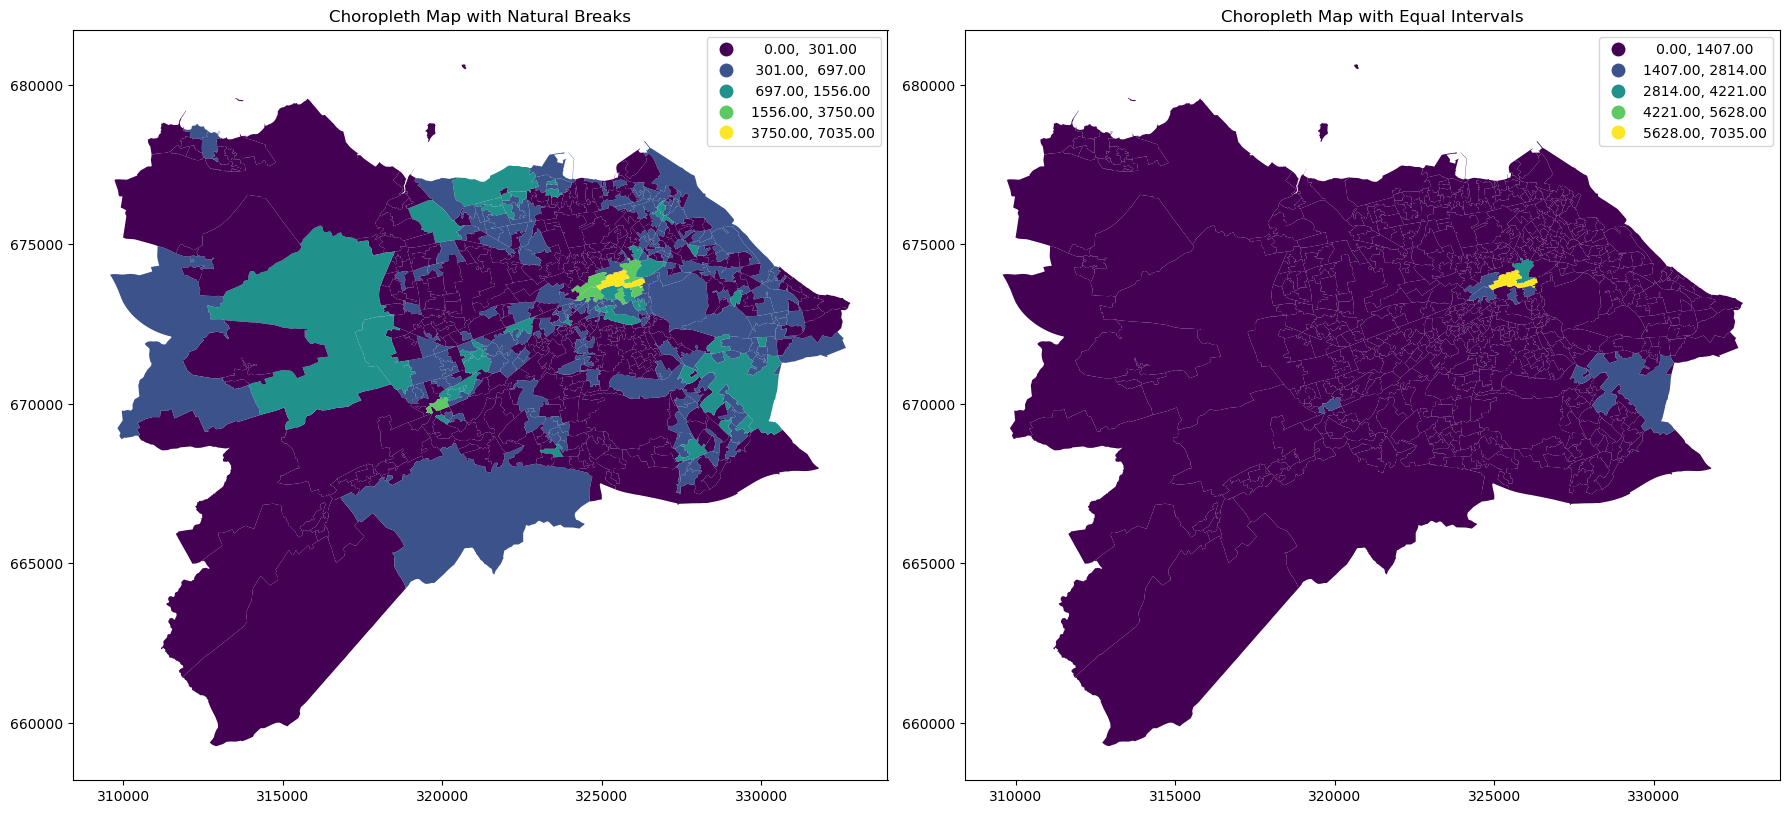

In [18]:
#comparing the two chloropleth maps for crime rates in Edinburgh
fig, axs = plt.subplots(1, 2, figsize=(18, 8))

gdf_subset.plot(column='CrimeRate', ax=axs[0],
         legend=True, cmap='viridis',
         scheme='UserDefined',
         classification_kwds={'bins': classifier_nb.bins}
        )

axs[0].set_title("Choropleth Map with Natural Breaks")

gdf_subset.plot(column='CrimeRate', ax=axs[1],
         legend=True, cmap='viridis',
         scheme='UserDefined',
         classification_kwds={'bins': classifier_ei.bins})

axs[1].set_title("Choropleth Map with Equal Intervals")
#using the tight layout
plt.tight_layout() 
plt.show()

In [19]:
#creating chloropleth mapbox using natural breaks
num_classes = 5

classifier_edi = mc.NaturalBreaks(gdf_subset['CrimeRate'], k=num_classes)
gdf_subset['classification_edi'] = classifier_edi.yb #yb to get the values from the array.

print(classifier_edi)
print(gdf_subset[['CrimeRate', 'classification_nb']])

C:\Users\user\MiniForge\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\user\MiniForge\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


NaturalBreaks

     Interval        Count
--------------------------
[   0.00,  307.00] |   362
( 307.00,  708.00] |   187
( 708.00, 1556.00] |    41
(1556.00, 3750.00] |     6
(3750.00, 7035.00] |     1


KeyError: "['classification_nb'] not in index"

In [35]:
fig = px.choropleth_mapbox(gdf_subset,
                           geojson=gdf_subset.geometry,
                           locations=gdf_subset.index,
                           color="classification_nb",
                           color_continuous_scale="viridis",
                           range_color= (1, 5),
                           opacity=0.5,
                           center={"lat": 55.866193, "lon": -4.258246},
                           mapbox_style="carto-positron",
                           zoom=9.5)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

NameError: name 'px' is not defined

In [21]:
#checking for the LA name for glasgow
print(gdf["LAName"].unique()) 

['Aberdeen City' 'Aberdeenshire' 'Angus' 'Argyll and Bute'
 'Clackmannanshire' 'Dumfries and Galloway' 'Dundee City' 'East Ayrshire'
 'East Dunbartonshire' 'East Lothian' 'East Renfrewshire'
 'City of Edinburgh' 'Na h-Eileanan an Iar' 'Falkirk' 'Fife'
 'Glasgow City' 'Highland' 'Inverclyde' 'Midlothian' 'Moray'
 'North Ayrshire' 'North Lanarkshire' 'Orkney Islands' 'Perth and Kinross'
 'Renfrewshire' 'Scottish Borders' 'Shetland Islands' 'South Ayrshire'
 'South Lanarkshire' 'Stirling' 'West Dunbartonshire' 'West Lothian']


In [27]:
#comparing glasgow and edinburgh 

#creating a subset for glasgow to compare to edinburgh
gdf_subset2 = gdf[gdf["LAName"] == "Glasgow City"]
gdf_subset2.head(3)

,DataZone,DZName,LAName,SAPE2017,WAPE2017,Rankv2,Quintilev2,Decilev2,Vigintilv2,Percentv2,...,CrimeRate,CrimeRank,HouseNumOC,HouseNumNC,HouseOCrat,HouseNCrat,HouseRank,Shape_Leng,Shape_Area,geometry
3252,S01009758,Darnley East - 01,Glasgow City,624,407,4997,4,8,15,72,...,81,5523.0,73,43,13%,8%,1021.0,1474.152028,78490.309008,"POLYGON ((254366.687 658648.165, 254302.649 65..."
3253,S01009759,Darnley East - 02,Glasgow City,860,570,161,1,1,1,3,...,561,791.0,223,29,24%,3%,494.0,2170.701472,136091.515542,"POLYGON ((254197 660082, 254187 660053, 254182..."
3254,S01009760,Darnley East - 03,Glasgow City,852,550,998,1,2,3,15,...,318,2079.0,173,8,19%,1%,1157.0,3057.747139,332345.088422,"POLYGON ((254419.1 659330.5, 254431.196 659308..."


In [28]:
#observing the columns
gdf_subset2.columns

Index(['DataZone', 'DZName', 'LAName', 'SAPE2017', 'WAPE2017', 'Rankv2',
       'Quintilev2', 'Decilev2', 'Vigintilv2', 'Percentv2', 'IncRate',
       'IncNumDep', 'IncRankv2', 'EmpRate', 'EmpNumDep', 'EmpRank', 'HlthCIF',
       'HlthAlcSR', 'HlthDrugSR', 'HlthSMR', 'HlthDprsPc', 'HlthLBWTPc',
       'HlthEmergS', 'HlthRank', 'EduAttend', 'EduAttain', 'EduNoQuals',
       'EduPartici', 'EduUniver', 'EduRank', 'GAccPetrol', 'GAccDTGP',
       'GAccDTPost', 'GAccDTPsch', 'GAccDTSsch', 'GAccDTRet', 'GAccPTGP',
       'GAccPTPost', 'GAccPTRet', 'GAccBrdbnd', 'GAccRank', 'CrimeCount',
       'CrimeRate', 'CrimeRank', 'HouseNumOC', 'HouseNumNC', 'HouseOCrat',
       'HouseNCrat', 'HouseRank', 'Shape_Leng', 'Shape_Area', 'geometry'],
      dtype='object')

In [33]:
#generating a mapbox for Glasgow crime rate
num_classes = 5

classifier_gla = mc.NaturalBreaks(gdf_subset2['CrimeRate'], k=num_classes)
gdf_subset2['classification_gla'] = classifier_nb.yb #yb to get the values from the array.

print(classifier_gla)
print(gdf_subset2[['CrimeRate', 'classification_nb']])

C:\Users\user\MiniForge\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


ValueError: Length of values (597) does not match length of index (746)

In [30]:
fig = px.choropleth_mapbox(gdf_subset2,
                           geojson=gdf_subset2.geometry,
                           locations=gdf_subset2.index,
                           color="classification_nb",
                           color_continuous_scale="viridis",
                           range_color= (1, 5),
                           opacity=0.5,
                           center={"lat": 55.866193, "lon": -4.258246},
                           mapbox_style="carto-positron",
                           zoom=9.5)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

NameError: name 'px' is not defined

In [31]:
#comparing the mapbox for Glasgow vs Edinburgh's crime rate
ig = make_subplots(rows=1, cols=2, subplot_titles=("Glasgow Crime Rate", "Edinburgh Crime Rate"),
                    specs=[[{"type": "mapbox"}, {"type": "mapbox"}]])

#combining both figures
fig.add_trace(fig_glasgow.data[0], row=1, col=1)
fig.add_trace(fig_edinburgh.data[0], row=1, col=2)

#updating the layout
fig.update_layout(mapbox_style="carto-positron",
                  margin={"r":0,"t":50,"l":0,"b":0},
                  height=600,
                  showlegend=False)
#displaying the figure
fig.show()

NameError: name 'make_subplots' is not defined